### Problem Statement

*Predicting housing prices is of interest to potential buyers, sellers, and organizations alike. Multiple online platforms offer, for example, a free “price estimate” based on underlying machine learning models. For this assignment, we are going to build the best machine learning model we can for Ames, Iowa. The data set consists of 79 features that describe the quality and quantity of the properties to base our predictions on.*

# Task 0: Data Preperation

*Note: No code has to be written for the 5 cells below - you may just execute them sequentially. After this, you may move on to **Task 1** on understanding the data.*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from scipy.stats import pearsonr

In [2]:
# All missing data removed/cleaned
housing_df = pd.read_csv("ames_data_no_missing.csv", index_col=0)
housing_df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
housing_df.shape

(2930, 79)

In [4]:
[col for col in housing_df.columns if housing_df[col].dtype=='object']

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [5]:
#Check the number of dummies to be created
count = [housing_df[col].nunique() for col in housing_df.columns if housing_df[col].dtype==object]
sum(count)

269

In [6]:
# ensure Python reads the categorical variables as categorical
for column in housing_df.columns:
    if housing_df[column].dtype == 'object':
        housing_df[column] = pd.Categorical(housing_df[column])

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 526301100 to 924151050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS SubClass      2930 non-null   int64   
 1   MS Zoning        2930 non-null   category
 2   Lot Frontage     2930 non-null   float64 
 3   Lot Area         2930 non-null   int64   
 4   Street           2930 non-null   category
 5   Alley            198 non-null    category
 6   Lot Shape        2930 non-null   category
 7   Land Contour     2930 non-null   category
 8   Lot Config       2930 non-null   category
 9   Land Slope       2930 non-null   category
 10  Neighborhood     2930 non-null   category
 11  Condition 1      2930 non-null   category
 12  Condition 2      2930 non-null   category
 13  Bldg Type        2930 non-null   category
 14  House Style      2930 non-null   category
 15  Overall Qual     2930 non-null   int64   
 16  Overall Cond     2930 non-null   i

In [8]:
#define our RMSE function
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

# Task 1: Understand the Data
*Take some time to familiarize yourself with the data. It contains information about housing prices in Ames. What are the key variables?*

*You may perform any additional EDA if necessary.*

### 1.1
*What is the distribution of housing prices?*

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


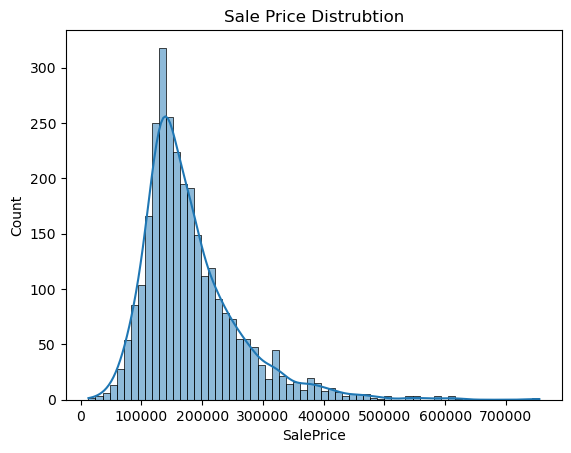

In [9]:
# The original distribution
sns.histplot(housing_df['SalePrice'], kde=True)
plt.title('Sale Price Distrubtion')
plt.show()

### 1.2
*What is the variable that has the highest correlation with Housing prices? What are the key drivers behind larger house prices?*

In [10]:
#Find the correlations of all variables with SalePrice
housing_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647562
Garage Area        0.640138
Total Bsmt SF      0.632529
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.433147
Lot Frontage       0.340484
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Yr Blt      0.253459
Bsmt Unf SF        0.183308
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

In [11]:
corr_df=pd.DataFrame(housing_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)).reset_index()
corr_df.columns=['Column','Correlation']
corr_df=corr_df[corr_df['Column']!='SalePrice']
corr_df

,Column,Correlation
1,Overall Qual,0.799262
2,Gr Liv Area,0.706780
3,Garage Cars,0.647562
4,Garage Area,0.640138
5,Total Bsmt SF,0.632529
6,1st Flr SF,0.621676
7,Year Built,0.558426
8,Full Bath,0.545604
9,Year Remod/Add,0.532974
10,Mas Vnr Area,0.502196


### 1.3
*Create one additional visualization, that gives some insights into the data.*

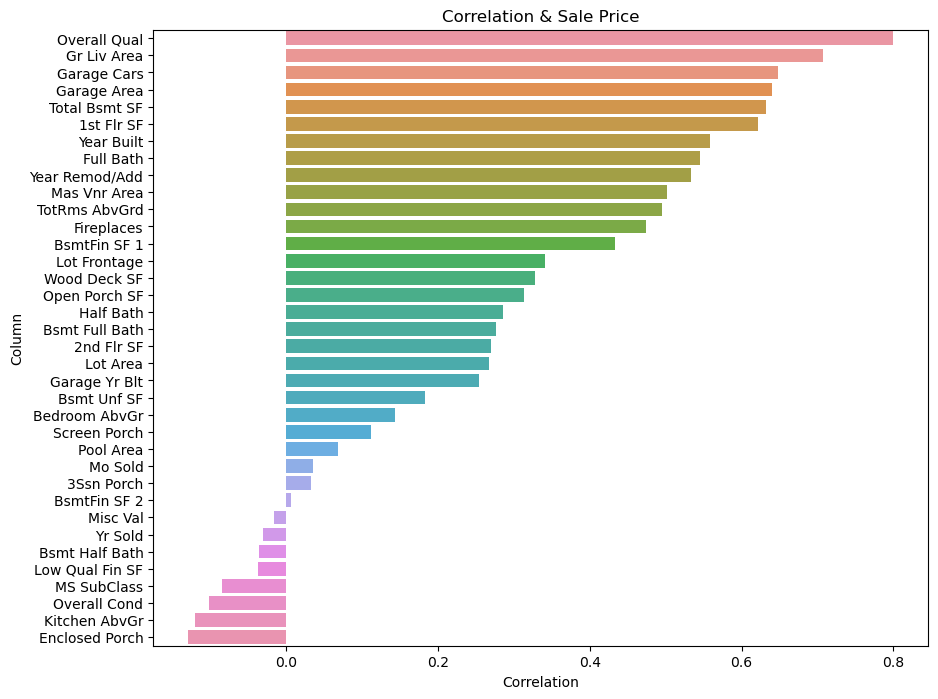

In [12]:
# Create a visualization to highlight any insight - Can be a scatter plot, line plot, box plot, histogram or any other visualization that you might know!
plt.figure(figsize=(10,8))
sns.barplot(data=corr_df,x='Correlation',y='Column')
plt.title('Correlation & Sale Price')
plt.show()

# Task 2: Build machine learning models

*Use your knowledge of prediction models to create at least three models that predict housing prices.*

### 2.1 
1. *Create dummies for all the categorical columns*.

2. *Partition your data into training and validation (70-30 split, setting the random state to 1).*
3. *Scale the train and the test set using StandardScaler()*

In [13]:
# Initialize X and y
X = housing_df.drop(columns=['SalePrice']) # All but the outcome column
y = housing_df['SalePrice']

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 526301100 to 924151050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS SubClass      2930 non-null   int64   
 1   MS Zoning        2930 non-null   category
 2   Lot Frontage     2930 non-null   float64 
 3   Lot Area         2930 non-null   int64   
 4   Street           2930 non-null   category
 5   Alley            198 non-null    category
 6   Lot Shape        2930 non-null   category
 7   Land Contour     2930 non-null   category
 8   Lot Config       2930 non-null   category
 9   Land Slope       2930 non-null   category
 10  Neighborhood     2930 non-null   category
 11  Condition 1      2930 non-null   category
 12  Condition 2      2930 non-null   category
 13  Bldg Type        2930 non-null   category
 14  House Style      2930 non-null   category
 15  Overall Qual     2930 non-null   int64   
 16  Overall Cond     2930 non-null   i

In [15]:
num_cols=list(X.select_dtypes(include=['int','float']).columns)
print(num_cols)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


In [16]:
# Use dummy variables for categorical variables
X=pd.get_dummies(X,drop_first=True,dtype=int)
X.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
# Train - Test split (70-30 split, setting the random state to 1)
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(2051, 263) (879, 263) (2051,) (879,)


In [18]:
# Scale the train and test set features separately
scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']
X_train[numeric_cols]=scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols]=scaler.fit_transform(X_val[numeric_cols])
X_train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
534402140,-0.874337,-0.020364,0.089401,-0.779898,0.401692,-0.203563,-0.907119,0.521606,0.627238,1.063638,...,-0.049435,-0.304469,-0.049435,-0.022086,0.398443,-0.069997,-0.091422,-0.125895,0.464508,-0.309224
527110020,0.545415,-0.020364,-0.212914,0.613457,-0.503660,0.753722,0.534832,-0.445676,-0.952979,-0.286190,...,-0.049435,-0.304469,-0.049435,-0.022086,0.398443,-0.069997,-0.091422,-0.125895,0.464508,-0.309224
909103020,-0.164461,0.302783,0.136891,-1.476576,1.307045,-2.052115,0.390637,-0.565228,-0.952979,-0.286190,...,-0.049435,-0.304469,-0.049435,-0.022086,0.398443,-0.069997,-0.091422,-0.125895,0.464508,-0.309224
527162090,-0.874337,-0.310176,-0.293083,0.613457,-0.503660,0.753722,0.534832,-0.358729,-0.952979,-0.286190,...,-0.049435,-0.304469,-0.049435,-0.022086,0.398443,-0.069997,-0.091422,-0.125895,0.464508,-0.309224
534429150,0.545415,0.727139,0.147539,-0.083221,0.401692,-0.368613,-1.147444,-0.076153,0.259944,-0.286190,...,-0.049435,-0.304469,-0.049435,-0.022086,0.398443,-0.069997,-0.091422,-0.125895,0.464508,-0.309224


### 2.2
*Build a linear regression model, a regression tree and a kNN model. Carefully apply regularization for the linear regression model. Carefully select which variables to use for the kNN model.*

In [19]:
# Linear model - USE LassoCV to get the best LASSO model

##### CODE HERE #####
alphas=np.arange(0.01,500,10)
lasso_cv_grid=LassoCV(alphas=alphas,cv=5,max_iter=10000)
lasso_cv_grid.fit(X_train,y_train)
print('The Best Alpha using LassoCv:', lasso_cv_grid.alpha_)

lin_reg_best=Lasso(alpha=lasso_cv_grid.alpha_)
lin_reg_best.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37665660944.050354, tolerance: 987615441.0702024
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38524182984.963684, tolerance: 1095889296.763553
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48021310975.770874, tolerance: 1107707653.1003366
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617

The Best Alpha using LassoCv: 490.01


Lasso(alpha=490.01)

In [20]:
# Tree Model - Use max depth to control the complexity of the tree. Run a Grid search for multiple values of max depth.

##### CODE HERE #####
param_grid={'max_depth':np.arange(1,20)}
grid=GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search=grid.fit(X_train, y_train)
print('Best max depth:', grid_search.best_params_)

tree_reg_best=DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
tree_reg_best.fit(X_train, y_train)

Best max depth: {'max_depth': 10}


DecisionTreeRegressor(max_depth=10)

In [21]:
tree_reg=DecisionTreeRegressor(random_state=0)
path=tree_reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
#creating a regression tree for each aplhas and storing them in a list
regs=[]
for ccp_alpha in ccp_alphas:
    curr_reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    curr_reg.fit(X_train,y_train)
    regs.append(curr_reg)

#creating empty list to store accuracy value for val set
val_rmse=[]
#iterating over the list of regression tree
for r in regs:
    y_pred=r.predict(X_val)
    #calculating the accuracy & apending the list
    val_rmse.append(rmse(y_val,y_pred))


#finding  the best value for cc_alpha with least RMSE
best_ccp_alpha= ccp_alphas[val_rmse.index(min(val_rmse))]
print('Best ccp_alpha:', best_ccp_alpha)

tree_reg_best1=DecisionTreeRegressor(random_state=0, ccp_alpha=best_ccp_alpha)
tree_reg_best1.fit(X_train, y_train)

Best ccp_alpha: 17852317.90450956


DecisionTreeRegressor(ccp_alpha=17852317.90450956, random_state=0)

In [24]:
# KNN Model

# Select the top 20 most correlated features and store it in a list called 'top_20_features' (using similar correlation table from Task 1)

top_20_features = corr_df.loc[:20]["Column"].tolist()


#For building the model, you must use X_train[top_20_features]

param_grid={'n_neighbors':np.arange(1,21)}
grid=GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=False)
grid_search = grid.fit(X_train[top_20_features], y_train)
print('The Min RMSE at n_neighbors=', grid_search.best_params_['n_neighbors'])



# Find the value of k for which RMSE is minimum, using GridSearchCV
knn_reg_best=KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg_best.fit(X_train[top_20_features], y_train)

The Min RMSE at n_neighbors= 9


KNeighborsRegressor(n_neighbors=9)

### 2.3
*Summarize the predictive performance in terms of RMSE.* 
1. *Calculate the RMSE values for train and validation for all the models*
2. *Display them in a tabulated format*

Hint: You may use the code that you've learnt in the 'Model selection' module

In [32]:
#linear regression

##### CODE HERE #####
lin_train_rmse = rmse(y_train, lin_reg_best.predict(X_train))
lin_val_rmse=rmse(y_val, lin_reg_best.predict(X_val))
#max depth pruned tree

##### CODE HERE #####
tree_train_rmse = rmse(y_train, tree_reg_best.predict(X_train))
tree_val_rmse = rmse(y_val, tree_reg_best.predict(X_val))


#knn

##### CODE HERE #####
knn_train_rmse = rmse(y_train,knn_reg_best.predict(X_train[top_20_features]))
knn_val_rmse = rmse(y_val, knn_reg_best.predict(X_val[top_20_features]))
#Display the RMSEs

##### CODE HERE #####
pd.DataFrame({'Model':['Linear Regression', 'Decision Tree','KNN'],
              'Train RMSE': [lin_train_rmse, tree_train_rmse, knn_train_rmse],
              'Validation RMSE':[lin_val_rmse, tree_val_rmse, knn_val_rmse]})

,Model,Train RMSE,Validation RMSE
0,Linear Regression,23527.661772,26348.982101
1,Decision Tree,10370.862557,36621.523535
2,KNN,29219.041763,28410.524886


### 2.4
*Study the largest errors that you made (largest overpredictions, largest underpredictions). What may be some of the reasons why the model is over/under predicting? Do these insights possibly help you improve the models?*

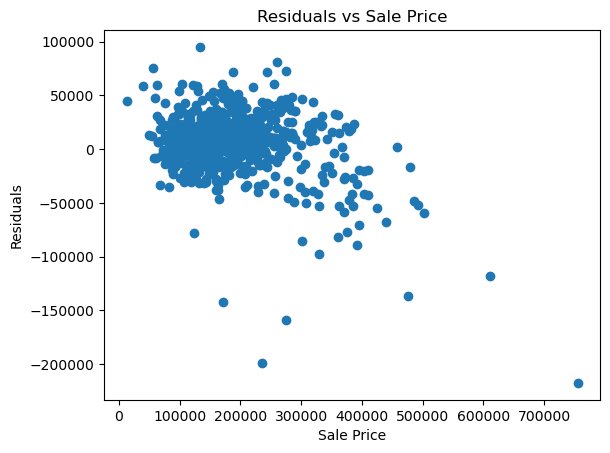

In [34]:
# Visualize the errors - plot a scatterplot of the residuals vs the true SalePrice

##### CODE HERE #####
residual= lin_reg_best.predict(X_val)-y_val
plt.scatter(y_val,residual)
plt.xlabel('Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Sale Price')
plt.grid
plt.show()

In [37]:
X_val[(residual <-1e5) & (y_val < 375000)]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
905426150,0.496790,0.034666,1.375381,-0.027811,1.260916,-0.115397,-0.805999,-0.5712,-1.022573,-0.312525,...,-0.058521,-0.282582,-0.047755,0.0,0.384083,-0.047755,11.161157,-0.12722,-2.178325,-0.284922
907196040,0.036644,0.306073,0.325850,0.712980,-0.513856,1.016827,0.867974,-0.5712,0.540892,-0.312525,...,-0.058521,-0.282582,-0.047755,0.0,0.384083,-0.047755,-0.089596,-0.12722,0.459068,-0.284922
914475020,0.496790,0.352440,0.002228,-0.027811,0.373530,0.250911,-0.279893,-0.5712,0.208391,-0.312525,...,-0.058521,-0.282582,-0.047755,0.0,0.384083,-0.047755,-0.089596,-0.12722,0.459068,-0.284922


# Task 3

### 3.1
*Are you able to improve your linear regression model by taking the log of the dependent variable? (remember to translate your predicted outcome back to the original units before calculating the RMSE)*

*Create a visualization, that highlights the distribution of prices when after taking log of the dependent variable*

Hint - You may use [numpy.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to get the log of the dependent variable

In [41]:
# Linear model - Using the log of the SalePrice as the dependent variable, run the LassoCV to obtain the best LASSO model
# Note that the optimum value of Alpha for this model would also be scaled down to a log scale. It's a better idea to simply search for the best alpha once again using LassoCV.

alphas = np.arange(0.001,.1,.0001)
lasso_cv_grid=LassoCV(alphas=alphas, cv=5, random_state=1, max_iter=10000)
lasso_cv_grid.fit(X_train, np.log2(y_train))
print('Best Alpha:', lasso_cv_grid.alpha_)
lin_reg_best_log= Lasso(alpha= lasso_cv_grid.alpha_, max_iter=10000)
lin_reg_best_log.fit(X_train, np.log2(y_train))

Best Alpha: 0.005200000000000002


Lasso(alpha=0.005200000000000002, max_iter=10000)

In [43]:
# Calculate the RMSE values for train and the test set

##### CODE HERE #####
lin_train_rmse_log=rmse(np.log2(y_train), lin_reg_best_log.predict(X_train))
lin_val_rmse_log=rmse(np.log2(y_val), lin_reg_best_log.predict(X_val))

In [44]:
# Display the RMSE values in a dataframe

##### CODE HERE #####
pd.DataFrame([['Linear Regression', lin_train_rmse, lin_val_rmse],
              ['Linear Regression (log)', lin_train_rmse_log, lin_val_rmse_log]],
              columns=['Model', 'Train RNSE', 'Val RMSE'])
              

,Model,Train RNSE,Val RMSE
0,Linear Regression,23527.661772,26348.982101
1,Linear Regression (log),0.162768,0.196253


### 3.2 Bonus Task
*Experiment with data segmentation: Should you subset the data and fit separate models for each subset?*

Data segmentation is generally useful when we think that subsegments of our data have substantially different relationships between their features and the outcome compared to other subsegments (i.e variable interactions). We can use a combination of prior knowledge and data exploration to build our domain knowledge about where this situation would apply.

Starting with prior knowledge, you can hypothesize $HouseStyle$ may be a candidate for data segmentation, as for instance, 3 bedrooms in a 1-story house may have a different effect on $SalePrice$ than 3 bedrooms in a 2-story house.

In [45]:
housing_df['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [46]:
housing_df['Bedroom AbvGr'].value_counts()

Bedroom AbvGr
3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: count, dtype: int64

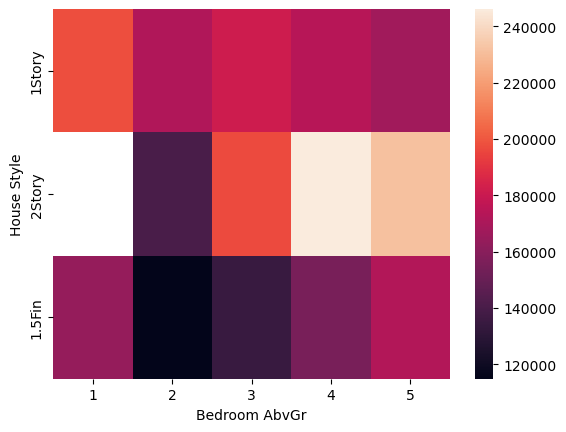

In [47]:
matrix = []
styles = ['1Story', '2Story', '1.5Fin']
for style in styles:
    curr_style = []
    for bedrooms in range(1, 6):
        curr_mean = housing_df[(housing_df['House Style'] == style) & 
                               (housing_df['Bedroom AbvGr'] == bedrooms)]['SalePrice'].mean()
        
        curr_style.append(curr_mean)
    matrix.append(curr_style)
sns.heatmap(matrix)
plt.ylabel('House Style')
plt.yticks(np.arange(3)+0.5, styles)
plt.xlabel('Bedroom AbvGr')
plt.xticks(np.arange(5)+0.5, np.arange(5)+1)
pass


We indeed see some interaction between the housing style and bedroom number, indicating data segmentation could be promising. 

*From here, it's your task to start building a linear model to see whether data segmentation will improve results.*

Hint: For the first two subtasks in 3.2, you could run a for-loop for each style in HouseStyles and evaluate/create the LASSO model.

In [51]:
# Linear Full Model (FM) - Train a Lasso model for the whole dataset 
alphas=np.arange(0.01,250,10)
lasso_cv_grid = LassoCV(alphas=alphas, cv=5, random_state=1, max_iter=10000)
lasso_cv_grid.fit(X_train, y_train)
print('Best alpha:', lasso_cv_grid.alpha_)

# Store the RMSE values of train and validation for all the 3 subsets of styles - You can loop through the HouseStyles
lin_reg_best = Lasso(alpha=lasso_cv_grid.alpha_, max_iter=10000)
lin_reg_best.fit(X_train,y_train)

rmse_table=[]
for style in styles:
    curr_row=[]
    curr_X_train = X_train[(housing_df['House Style'] == style)]
    curr_y_train = y_train[(housing_df['House Style'] == style)]
    curr_X_val = X_val[(housing_df['House Style'] == style)]
    curr_y_val = y_val[(housing_df['House Style'] == style)]
    lin_train_rmse = rmse(curr_y_train, lin_reg_best.predict(curr_X_train))
    lin_val_rmse =  rmse(curr_y_val, lin_reg_best.predict(curr_X_val))
    curr_row = curr_row + [lin_train_rmse, lin_val_rmse]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37665659029.77985, tolerance: 987615441.0702024
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38524184767.68817, tolerance: 1095889296.763553
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48021312954.4928, tolerance: 1107707653.1003366
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: Co

Best alpha: 240.01


C:\Users\deole\AppData\Local\Temp\ipykernel_15260\3886405850.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_X_train = X_train[(housing_df['House Style'] == style)]
C:\Users\deole\AppData\Local\Temp\ipykernel_15260\3886405850.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_X_val = X_val[(housing_df['House Style'] == style)]
C:\Users\deole\AppData\Local\Temp\ipykernel_15260\3886405850.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_X_train = X_train[(housing_df['House Style'] == style)]
C:\Users\deole\AppData\Local\Temp\ipykernel_15260\3886405850.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_X_val = X_val[(housing_df['House Style'] == style)]
C:\Users\deole\AppData\Local\Temp\ipykernel_15260\3886405850.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_X_train = X_train[(housing_df

In [53]:
# Linear Data Segmentation Model (DSM) - Train a Lasso model for the individual subset of styles - 1Story, 2Story and 1.5Fin

alphas= np.arange(0.01,250,10)
lasso_cv_grid = LassoCV(alphas=alphas, cv=5, random_state=1, max_iter=10000)
lasso_cv_grid.fit(curr_X_train,curr_y_train)
print('Best alpha:', lasso_cv_grid.alpha_)

lin_reg_best_ds= LassoCV(alphas=alphas, cv=5, random_state=1, max_iter=10000)
lin_reg_best_ds.fit(curr_X_train,curr_y_train)

lin_train_rmse = rmse(curr_y_train, lin_reg_best_ds.predict(curr_X_train))
lin_val_rmse = rmse(curr_y_val, lin_reg_best_ds.predict(curr_X_val))
curr_row =curr_row +[lin_train_rmse, lin_val_rmse]
rmse_table.append(curr_row)
# Store the RMSE values of train and validation for all the 3 subsets of styles


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.035e+08, tolerance: 3.070e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+08, tolerance: 3.892e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.337e+08, toleranc

Best alpha: 240.01


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.035e+08, tolerance: 3.070e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+08, tolerance: 3.892e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.337e+08, toleranc

In [54]:
# Create a DataFrame to store the values of RMSE for both the models on the train and validation sets on all the 3 subsets of data

##### CODE HERE #####
pd.DataFrame(rmse_table,columns=['FM RMSE TRAIN', 'FM RMSE VALIDATION', 'DS RMSE TRAIN', 'DS RMSE VAL'], index=styles)

,FM RMSE TRAIN,FM RMSE VALIDATION,DS RMSE TRAIN,DS RMSE VAL
1Story,16509.285524,20650.393746,7140.267208,22511.448656
2Story,16509.285524,20650.393746,7140.267208,22511.448656
1.5Fin,16509.285524,20650.393746,7140.267208,22511.448656


*Write down your inferences about the performance of the subsetted model here -* 

...

# Task 4: Summarize your findings
*Now take some time to translate your results into valuable insights.*

### 4.1
*What drives housing prices? Find the top 20 major drivers.*

Hint - In course 3 module 1, you have already seen how to store the coefficients of a model in a dictionary. You can convert the dictionary into a DataFrame and sort the dataframe by the coefficients. [Here's](https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe) some guidance on how to convert dictionary into a DataFrame.

In [55]:
# Visualize all the columns and their coefficients sorted in descending order to understand the ones that has the most say in the SalePrice
# Hint - Check the code for Course 3 Module 1 - Linear regression in a predictive setting to 
coefficients = pd.DataFrame(lin_reg_best.coef_, index=X_train.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient',ascending=False, inplace=True)
print(coefficients.head(20))

                       Coefficient
Gr Liv Area           24430.026857
Overall Qual          12718.617195
Misc Feature_Gar2     11144.283531
Pool Area              9487.025515
Neighborhood_NridgHt   8257.047552
Year Built             7597.967793
Neighborhood_StoneBr   7052.535945
BsmtFin SF 1           6226.935754
Neighborhood_NoRidge   5642.796389
Overall Cond           5528.832478
Total Bsmt SF          5177.108765
Neighborhood_Somerst   4739.847548
Bsmt Exposure_Gd       4714.201423
Fireplaces             4682.129231
Misc Feature_Othr      4376.162910
Roof Matl_CompShg      4028.866129
Sale Type_New          3860.787719
Garage Cars            3776.920783
Mas Vnr Area           3657.724860
Condition 1_Norm       2982.265888


*You can also use a built in variable importance function from decision trees to capture a summary of the importance of different features in our regression tree.* 

Note: There is no coding to be done in this cell. Just execute this cell and observe the feature importances.

In [56]:
# Extract the feature_importances_ attribute from the tree model (feature_importances_ is an attribute available in trained sklearn models)

# Extracting the importances by sklearn (Replace tree_reg_best by the variable of your tree model)
importances_sk = tree_reg_best.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_df = []
for i, feature in enumerate(X_train.columns):
    feature_importance_df.append([feature, round(importances_sk[i], 3)])
   
feature_importance_df = pd.DataFrame(feature_importance_df,
                                     columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(f"Feature importance by sklearn: ")
feature_importance_df.iloc[:20]

Feature importance by sklearn: 


,Feature,Importance
0,Overall Qual,0.674
1,Gr Liv Area,0.111
2,Total Bsmt SF,0.059
3,1st Flr SF,0.027
4,BsmtFin SF 1,0.019
5,Lot Area,0.009
6,Overall Cond,0.007
7,Year Built,0.007
8,Garage Area,0.007
9,Wood Deck SF,0.006


### 4.2
*What is the predictive performance of your models?*

In [57]:
# Compare the RMSE of the train and the validation set for all the models. You can reuse the code from exercise 2.3.
importances_sk=tree_reg_best.feature_importances_
feature_importances_df=[]
for i, feature in enumerate(X_train.columns):
    feature_importances_df.append([feature, round(importances_sk[i],3)])

feature_importances_df=pd.DataFrame(feature_importances_df, columns=['feature','Importance'])
feature_importances_df=feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(f"Feature importance by sklearn:")
feature_importances_df.iloc[:20]

Feature importance by sklearn:


,feature,Importance
0,Overall Qual,0.674
1,Gr Liv Area,0.111
2,Total Bsmt SF,0.059
3,1st Flr SF,0.027
4,BsmtFin SF 1,0.019
5,Lot Area,0.009
6,Overall Cond,0.007
7,Year Built,0.007
8,Garage Area,0.007
9,Wood Deck SF,0.006


*Which model performs the best?*

...

### 4.3
*How reliable are your predictions?*

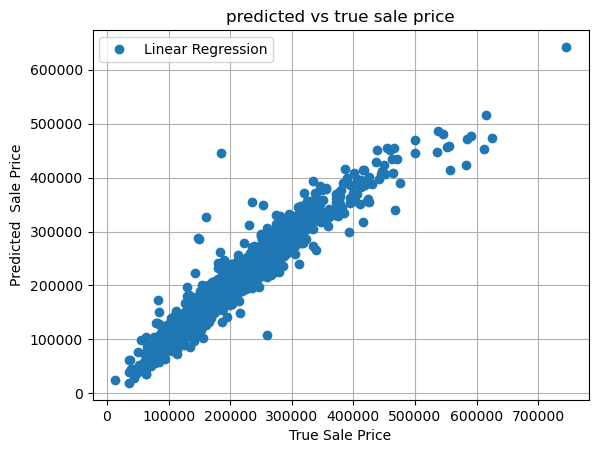

In [60]:
#Plot a scatterplot of the predicted vs the true value of the SalePrice
plt.plot(y_train,lin_reg_best.predict(X_train), 'o', label='Linear Regression')
plt.xlabel('True Sale Price')
plt.ylabel('Predicted  Sale Price')
plt.legend()
plt.title('predicted vs true sale price')
plt.grid()
plt.show()


*A histogram of errors could also give a good insight on any underlying patterns*

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


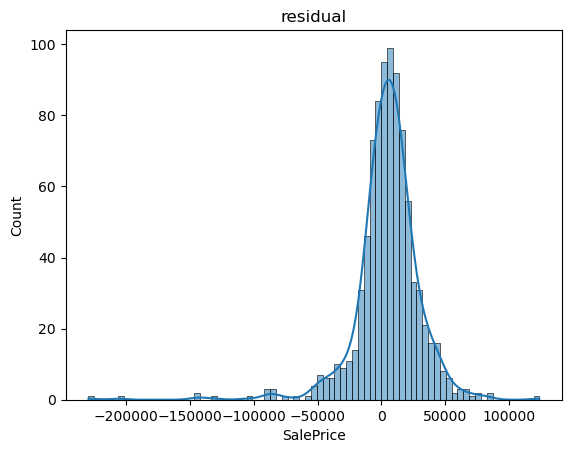

In [63]:
#Plot a histogram of the residuals. 
residual1= lin_reg_best.predict(X_val)-y_val
sns.histplot(residual1, kde=True)
plt.title('residual')
plt.show()